# Homework 3

## Tyler Valdez 
## UTEID: trv359

## Normal and t distributions
## t-test


An experiment was conducted to determine the effect of children participating in a given meal preparation on calorie intake for that meal. Data are recorded below. 

Save the data to a format that can be read into python. Read the data in for analysis. Data is provided in two separted CSV files. 

* Use python to calculate the quantities and generate the visual summaries requested below. You will lose points if you are not utilizing python.

* You can use scipy libary or other libraries to do your tests or you can implement them from scratch in python 



In [70]:
# Standard Headers
# You are welcome to add additional headers here if you wish
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, optimize, interpolate

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

# Question - 1
Summarize the data by whether children participated in the meal preparation or not. Use an appropriately labelled table to show the results. Also include a graphical presentation that shows the distribution of calories for participants vs. non-participants. Describe the shape of each distribution and comment on the similarity (or lack thereof) between the distributions in each population. **(2 points)**


***For each graphical presentation of the two distributions, it seems both graphs are leaning towards to having a not symetic shape. Both experience higher frequencies in the middle around the 400 calorie intake area. The non-participants graph though, seems to also have that higher frequency build up also in the 250-300 calorie intake area. Also the participants graph has more frequency going towards the 600 calorie intake area than the non-frequency graph.***

        participants  nonparticipants
size       25.000000        25.000000
min       210.990000       139.690000
max       635.210000       688.770000
median    424.940000       374.740000
mean      410.079600       374.071818
std       121.513786       133.139285
var     14765.600229     17726.069149


Text(0.04, 0.5, 'Frequency')

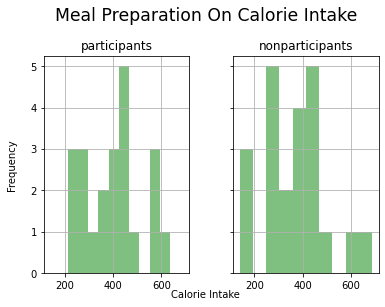

In [72]:
df = pd.concat(map(pd.read_csv, ['participants.csv', 'nonparticipants.csv']), axis = 1)
data = df.agg(
    {
        "participants": ["size", "min", "max", "median", "mean", "std", "var"],
        "nonparticipants": ["size", "min", "max", "median", "mean", "std", "var"],
    }
)
df1 = pd.DataFrame(data)
print(df1)
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True)
distribution = df.dropna().hist(bins=10,alpha=0.5,color='g', ax=axes)
plt.suptitle('Meal Preparation On Calorie Intake', x=0.5, y=1.05, ha='center', fontsize='xx-large')
fig.text(0.5, 0.04, 'Calorie Intake', ha='center')
fig.text(0.04, 0.5, 'Frequency', va='center', rotation='vertical')

# Question - 2 

Does the mean calorie consumption for those who participated in the meal preparation differ from **425**? Formally test at the $\alpha = 0.05$ level using the 5 steps outlined in the module. **(6 points)**


**1. Set up the hypotheses and select the alpha level**

H0 ∶ μ = 425
H1 ∶ μ ≠ 425 
α = 0.05

**2. Select the appropriate test statistic**

Use scipy's ttest_1samp function

**3. State the decision rule**

Critical value from the standard t-distribution associated with a right hand tail probability of = 0.025 
based on df = 24 is 1.72.

Decision Rule: Reject H0 if StS ≥ 1.72 , Otherwise, do not reject H0

**4. Compute the test statistic and the associated p-value**

See code for output of t_statistic and p_value

**5. Conclusion**

Accept H0 since -0.61 is less than 1.72. We have evidence at the α = 0.05 level that the mean calorie consumption does not differ from 425.

In [63]:
# Degrees of freedom is 25 - 1 = 24
# Find critical value with scipy.stats
crit_value = stats.t.ppf(0.05, 24)
# Perform One Sample T-Test On Participants, assume popmean is 425
t_statistic, p_value = stats.ttest_1samp(a=df['participants'], popmean=425)
print("The T Statistic value is ", (t_statistic),  "and the P-Value is ", (p_value))
print("We accept H0 (μ = 425) since -0.61 is less than 1.72. We have evidence at the α = 0.05 level that the mean calorie consumption does not differ from 425.")

The T Statistic value is  -0.6139385690489593 and the P-Value is  0.5450319510318798
We accept H0 (μ = 425) since -0.61 is less than 1.72. We have evidence at the α = 0.05 level that the mean calorie consumption does not differ from 425.


# Question -3 
Calculate a **90%** confidence interval for the mean calorie intake for participants in the meal preparation. Interpret the confidence interval. **(6 points)**

***In the case of the participants in the meal preparation, the calculated confident mean interval of the population with 90% is (368.26, 451.89). Meaning there's a 90% chance the true population mean lies in this interval.***

In [64]:
# Calculating 90% confidence interval with degrees of freedom (24) and mean of partcipation data.
print("The 90% confidence interval for the mean calorie intake of participants is", stats.t.interval(alpha=0.90, df=24,
              loc=np.mean(df['participants']),
              scale=stats.sem(df['participants'])))

The 90% confidence interval for the mean calorie intake of participants is (368.50044815647885, 451.65875184352086)


# Question 4 
Formally test whether or not participants consumed 
more calories than non-participants at the $\alpha = 0.05$ level using the 5 steps procedure for hypothesis tests. **(6 points )**

**1. Set up the hypotheses and select the alpha level**

H0 ∶ μ(participants) = μ(nonparticipants)
H1 ∶ μ(participants) ≠ μ(nonparticipants)
α = 0.05

**2. Select the appropriate test statistic**

Use scipy's ttest_ind function

**3. State the decision rule**

Critical value from the standard t-distribution associated with a right hand tail probability of = 0.5 
based on df = 25+22-2=45 is 1.68.

Decision Rule: Reject H0 if t ≥ 1.68 , Otherwise, do not reject H0

**4. Compute the test statistic and the associated p-value**

See code for output of t_statistic and p_value

**5. Conclusion**

Accept H0 since 0.96 is less than 1.68. We have evidence at the α = 0.05 level that the mean calorie consumption of participants does not differ from the mean calorie consumption of nonparticipants.

In [65]:
# Degrees of freedom is 25+22-2 = 45
# Find critical value with scipy.stats
crit_value = stats.t.ppf(0.05, 45)
# Perform Two Sample T-Test On Participants and Nonparticipants.
t_statistic, p_value = stats.ttest_ind(a=df['participants'], b=df.dropna()['nonparticipants'], 
                      equal_var=True)
print("The T Statistic value is ", (t_statistic),  "and the P-Value is ", (p_value))
print("We accept H0 (μ(participants) = μ(nonparticipants)) since 0.96 is less than 1.72. We have evidence at the α = 0.05 level that the mean calorie consumption for participants does not differ from the mean calorie consumption of nonparticipants.")

The T Statistic value is  0.9693504409241457 and the P-Value is  0.337551821942647
We accept H0 (μ(participants) = μ(nonparticipants)) since 0.96 is less than 1.72. We have evidence at the α = 0.05 level that the mean calorie consumption for participants does not differ from the mean calorie consumption of nonparticipants.
